In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pylab import rcParams

In [2]:
from importlib import reload
import time_series_module as tsm

In [3]:
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import Ridge

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df['date_time'] = pd.to_datetime(df['date_time'])
date_time = df['date_time'].copy()

In [6]:
tsm.get_date_time_features(df, 'date_time', month = True, season = True, year = True)

In [7]:
targets = ['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides']

In [8]:
def get_feature_list(df):
    return [f for f in list(df.columns) if f not in targets and f != 'date_time']

In [9]:
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import seasonal_decompose as SDE

In [10]:
f_dict = {}

In [11]:
tsm.feature_extractor(f_dict, df, lagged = [['deg_C', 'relative_humidity', 'absolute_humidity',
                                    'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5'] + targets, 24],
                               RWF = [targets, 24, np.std])

In [12]:
df.dropna(axis = 0, inplace = True)
date_time = date_time[list(df.index)]
date_time.index, df.index = list(range(len(df))), list(range(len(df)))

In [13]:
tsm.feature_extractor(f_dict, df, STL = [date_time,['lag_target_carbon_monoxide_24', 'lag_target_benzene_24', 'lag_target_nitrogen_oxides_24'], True, False, 'additive'])

In [14]:
f_dict

{'lagged': ['lag_deg_C_24',
  'lag_relative_humidity_24',
  'lag_absolute_humidity_24',
  'lag_sensor_1_24',
  'lag_sensor_2_24',
  'lag_sensor_3_24',
  'lag_sensor_4_24',
  'lag_sensor_5_24',
  'lag_target_carbon_monoxide_24',
  'lag_target_benzene_24',
  'lag_target_nitrogen_oxides_24'],
 'RWF': ['rol_target_carbon_monoxide_lag_24_std',
  'rol_target_benzene_lag_24_std',
  'rol_target_nitrogen_oxides_lag_24_std'],
 'STL': ['trend_lag_target_carbon_monoxide_24',
  'seasonal_lag_target_carbon_monoxide_24',
  'resid_lag_target_carbon_monoxide_24',
  'trend_lag_target_benzene_24',
  'seasonal_lag_target_benzene_24',
  'resid_lag_target_benzene_24',
  'trend_lag_target_nitrogen_oxides_24',
  'seasonal_lag_target_nitrogen_oxides_24',
  'resid_lag_target_nitrogen_oxides_24']}

In [15]:
df

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,...,rol_target_nitrogen_oxides_lag_24_std,trend_lag_target_carbon_monoxide_24,seasonal_lag_target_carbon_monoxide_24,resid_lag_target_carbon_monoxide_24,trend_lag_target_benzene_24,seasonal_lag_target_benzene_24,resid_lag_target_benzene_24,trend_lag_target_nitrogen_oxides_24,seasonal_lag_target_nitrogen_oxides_24,resid_lag_target_nitrogen_oxides_24
0,2010-03-11 18:00:00,10.4,67.4,0.8065,1501.9,1266.2,743.1,1937.2,1366.7,4.7,...,69.267768,1.502975,1.365585,-0.368560,5.315224,6.719826,-0.035050,104.637788,100.631714,-37.569502
1,2010-03-11 19:00:00,9.5,69.3,0.8319,1776.0,1398.7,723.1,2239.7,1584.7,7.2,...,89.705327,1.537921,1.570940,-1.008861,5.468658,7.265414,-2.834072,106.615406,101.397670,-109.113076
2,2010-03-11 20:00:00,10.1,63.7,0.8133,1607.2,1390.0,735.6,2103.4,1538.2,6.1,...,98.602699,1.572868,1.161761,-0.534629,5.622092,4.550937,-0.973029,108.593024,79.863935,-61.356959
3,2010-03-11 21:00:00,8.6,67.8,0.7419,1378.6,1033.0,890.0,1809.4,1220.8,3.9,...,100.453447,1.607814,0.268460,0.323726,5.775526,0.402810,3.521664,110.570642,20.157207,46.472151
4,2010-03-11 22:00:00,7.8,62.8,0.6905,994.0,704.1,1364.8,1319.7,812.8,1.5,...,100.994732,1.642761,-0.167711,0.024950,5.928960,-1.208162,1.679202,112.548259,-25.515308,34.767049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7082,2010-12-31 20:00:00,9.2,32.0,0.3871,1000.5,811.2,873.0,909.0,910.5,1.3,...,58.027946,0.935236,1.161761,0.303003,4.045687,4.550937,1.703377,164.929485,79.863935,67.406580
7083,2010-12-31 21:00:00,9.1,33.2,0.3766,1022.7,790.0,951.6,912.9,903.4,1.4,...,58.557308,0.931950,0.268460,0.299590,4.054483,0.402810,1.242707,165.049749,20.157207,21.893044
7084,2010-12-31 22:00:00,9.6,34.6,0.4310,1044.4,767.3,861.9,889.2,1159.1,1.6,...,59.973525,0.928664,-0.167711,0.139047,4.063279,-1.208162,0.244883,165.170014,-25.515308,31.045295
7085,2010-12-31 23:00:00,8.0,40.7,0.4085,952.8,691.9,908.5,917.0,1206.3,1.5,...,60.340230,0.925378,-0.232915,0.507538,4.072075,-1.698371,1.626295,165.290278,-36.838190,48.547912


In [16]:
#df['idx'] = pd.DataFrame(data = list(range(len(df))), index = list(range(len(df))))

In [17]:
features = get_feature_list(df)

In [18]:
from sklearn.metrics import mean_squared_error as MSE

In [19]:
def data_prep(data, features, targets, date_time):
    return data[features], data[targets], data[date_time]

In [20]:
def run_cv(data, date_time, features, target, cv_dict, model, metric = MSE, plot = False):
    cv = cv_dict['cv']
    cv_split = list(cv.split(len(data), cv_dict['step'], cv_dict['gap']))
    
    results = {'mean_Y' : np.zeros((cv.train_size + cv.test_size, 1)),
               'mean_Y_pred' : np.zeros((cv.train_size + cv.test_size, 1)), 
               'train_loss' : [], 'test_loss' : [], 'train_horizons' : [], 'test_horizons' : []}

    for train, test in cv_split:
        X_train, Y_train, X_test, Y_test = tsm.get_cv_matrices(df.loc[train], df.loc[test], features, target)
        
        fitted_model = model.fit(X_train, Y_train)
        Y_train_pred = np.reshape(fitted_model.predict(X_train), (len(X_train), -1))
        Y_pred = np.reshape(fitted_model.predict(X_test), (len(X_test), -1))
        #print(Y_pred.shape, Y_train_pred.shape)
        results['mean_Y'] += np.concatenate((Y_train, Y_test), axis = 0)
        results['mean_Y_pred'] += np.concatenate((Y_train_pred, Y_pred), axis = 0)
        results['train_loss'].append(metric(Y_train, fitted_model.predict(X_train)))
        results['test_loss'].append(metric(Y_test, fitted_model.predict(X_test)))
        results['train_horizons'].append(date_time[train[-1]])
        results['test_horizons'].append(date_time[test[-1]])
    
    results['mean_Y'] /= (cv.n_splits)
    results['mean_Y_pred'] /= (cv.n_splits)
    
    if plot:
        train_indexes = list(range(len(results['mean_Y'])))[:cv.train_size]
        test_indexes = list(range(len(results['mean_Y'])))[-cv.test_size:]
        plt.plot(train_indexes, results['mean_Y'][:cv.train_size], label = 'mean_Y_train')
        plt.plot(test_indexes, results['mean_Y'][-cv.test_size:], label = 'mean_Y_test', color = 'g')
        plt.plot(train_indexes, results['mean_Y_pred'][:cv.train_size], alpha = .5, label = 'mean_Y_train_pred')
        plt.plot(test_indexes, results['mean_Y_pred'][-cv.test_size:], color = 'r', alpha = .5, label = 'mean_Y_test_pred')
        plt.legend()
        plt.show()
        
    return results['train_loss'], results['test_loss'], results['train_horizons'], results['test_horizons']

In [21]:
def mape(Y, Y_hat):
    return 100 * np.abs(Y - Y_hat) / Y

In [22]:
ridge = Ridge(alpha = .0001, normalize = True)
linreg = LinReg(normalize = True)

In [23]:
len(df)

7087

In [24]:
rcParams['figure.figsize'] = 20, 8
cv = tsm.CrossValid(train_size = 2000, test_size = 740, min_period = 0)

target_carbon_monoxide


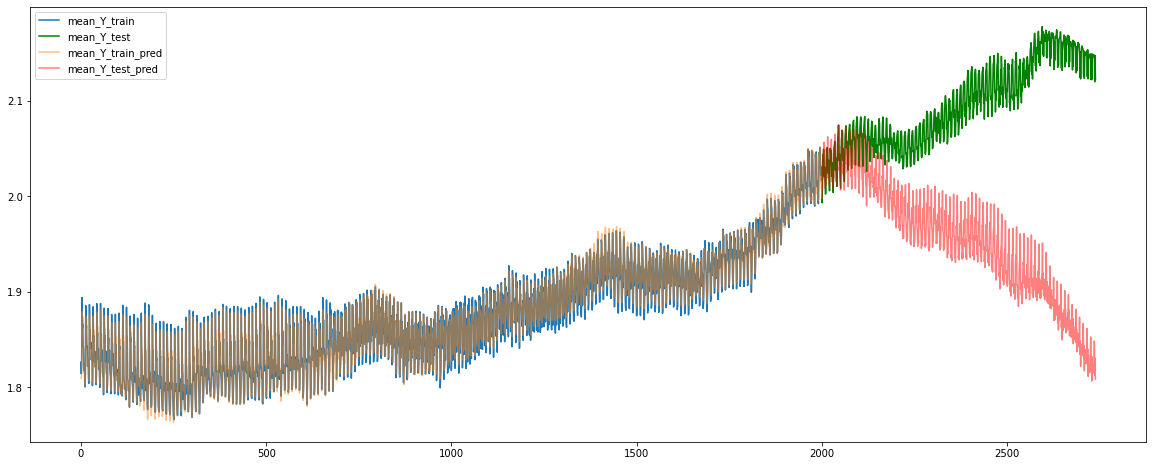

target_benzene


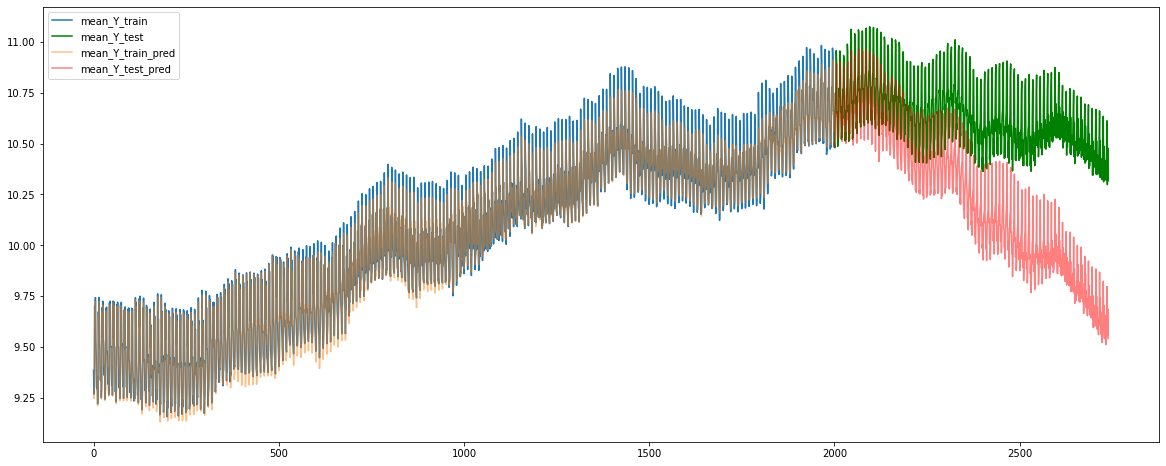

target_nitrogen_oxides


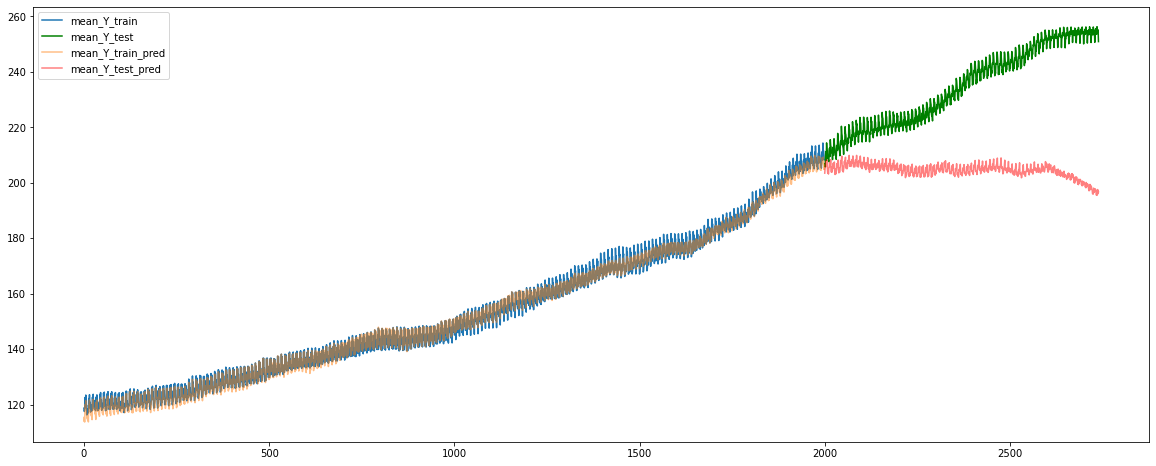

In [25]:
cv_dict = {'cv' : cv, 'step' : 10, 'gap' : 0}
target_dict = {}
for t in targets:
    print(t)
    target_dict[t] = run_cv(df, date_time, features, t, cv_dict, ridge, mape, True)

In [26]:
from functools import reduce

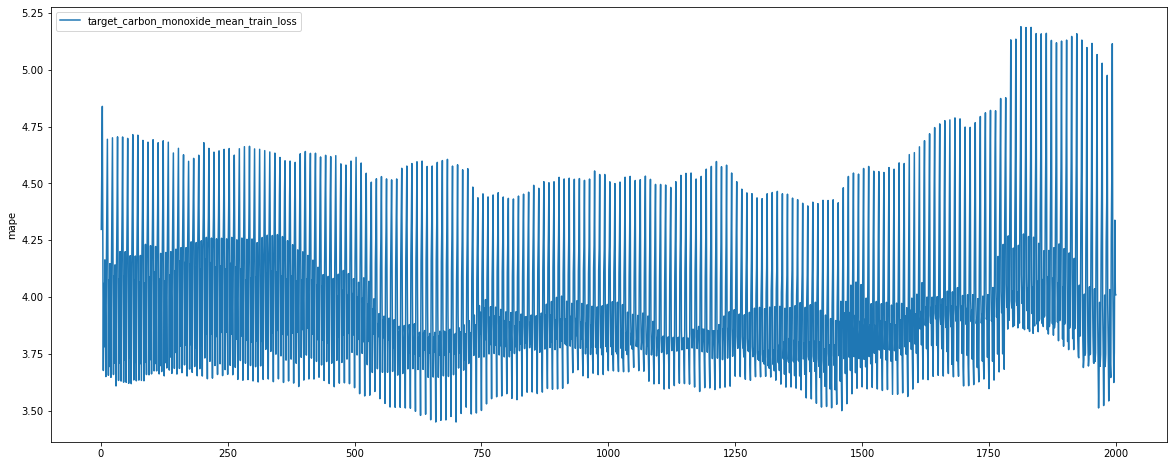

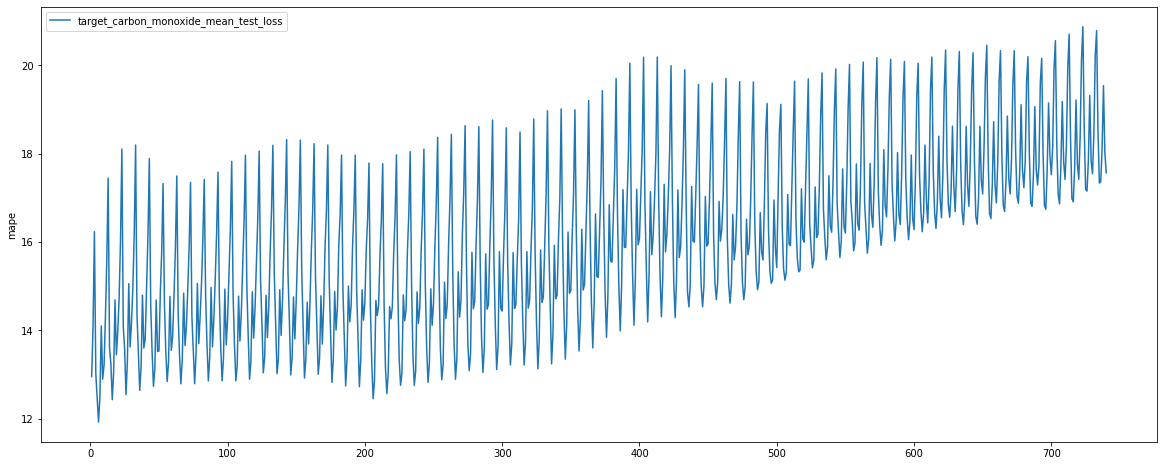

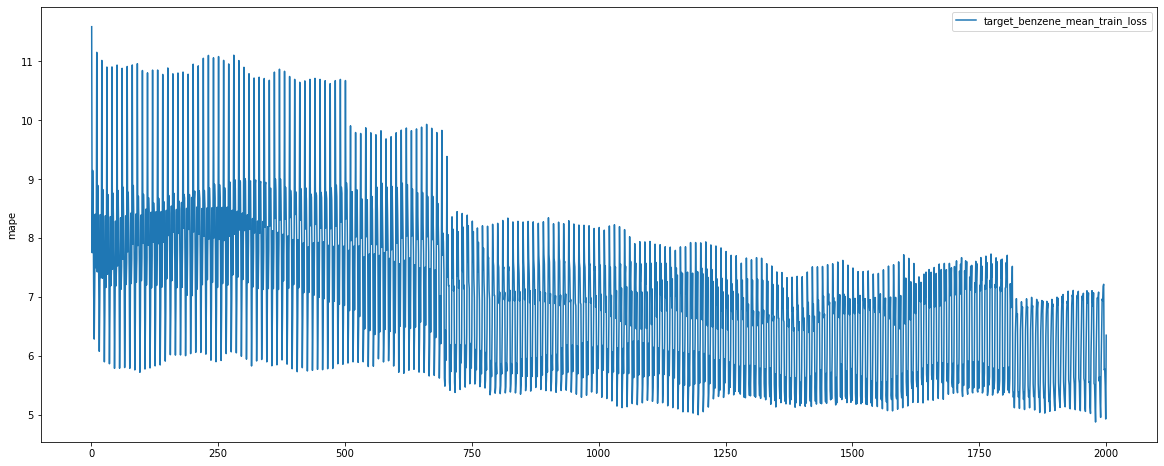

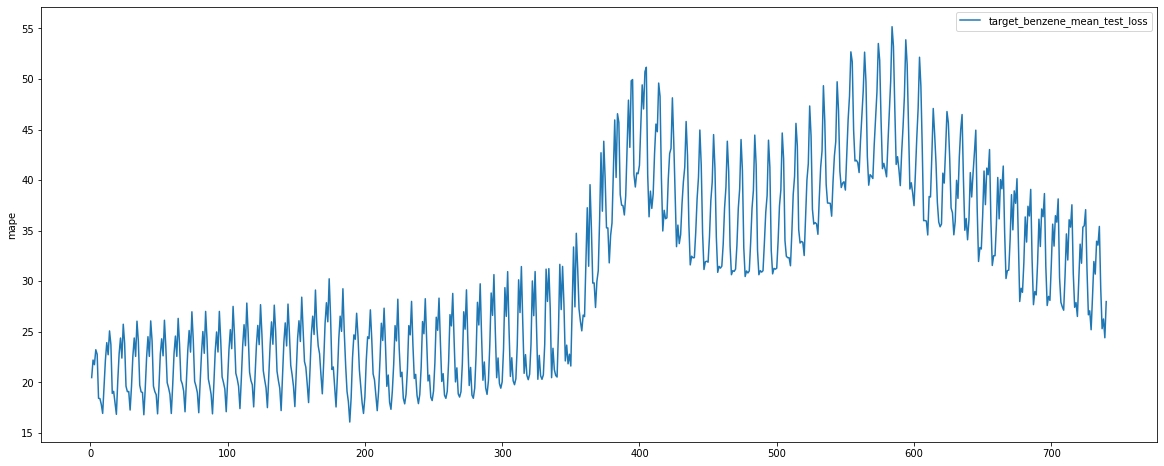

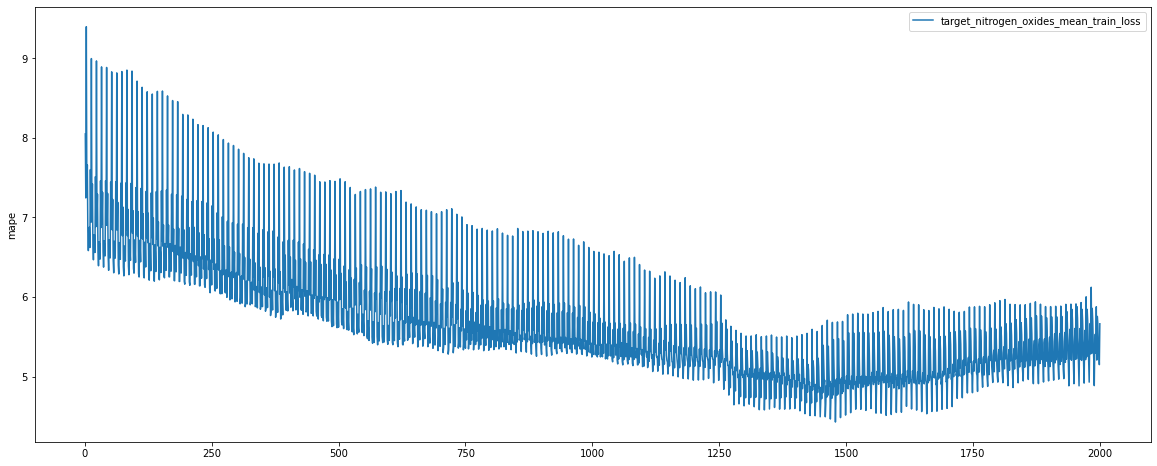

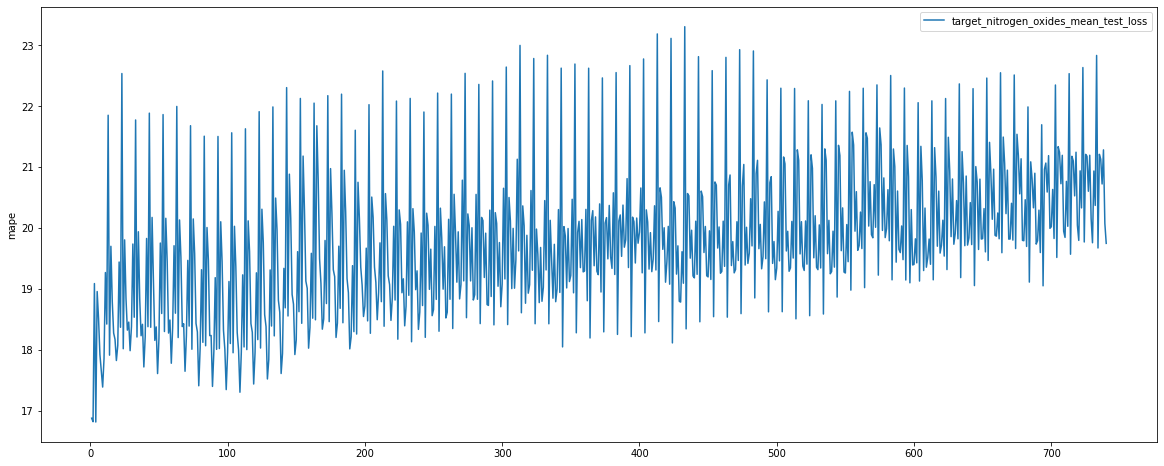

In [27]:
for key in target_dict.keys():    
    train_loss = target_dict[key][0]
    test_loss = target_dict[key][1]
    plt.plot(list(range(1,cv.train_size + 1)), reduce(lambda a, b : a + b, train_loss)/cv.train_size, label = key + '_mean_train_loss')
    plt.ylabel('mape')
    plt.legend()
    plt.show()
    plt.plot(list(range(1, cv.test_size + 1)),reduce(lambda a, b : a + b,  test_loss) / cv.test_size, label = key + '_mean_test_loss')
    plt.ylabel('mape')
    plt.legend()
    plt.show()

In [29]:
from xgboost.sklearn import XGBRegressor

In [32]:
xgbreg = XGBRegressor()
cvxgb = tsm.CrossValid(train_size = 2000, test_size = 740, min_period = 0)

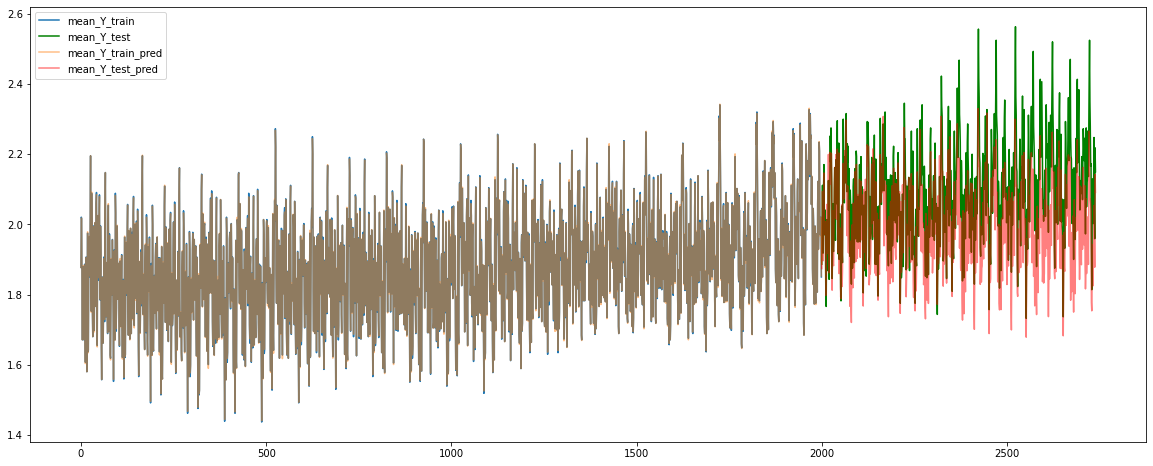

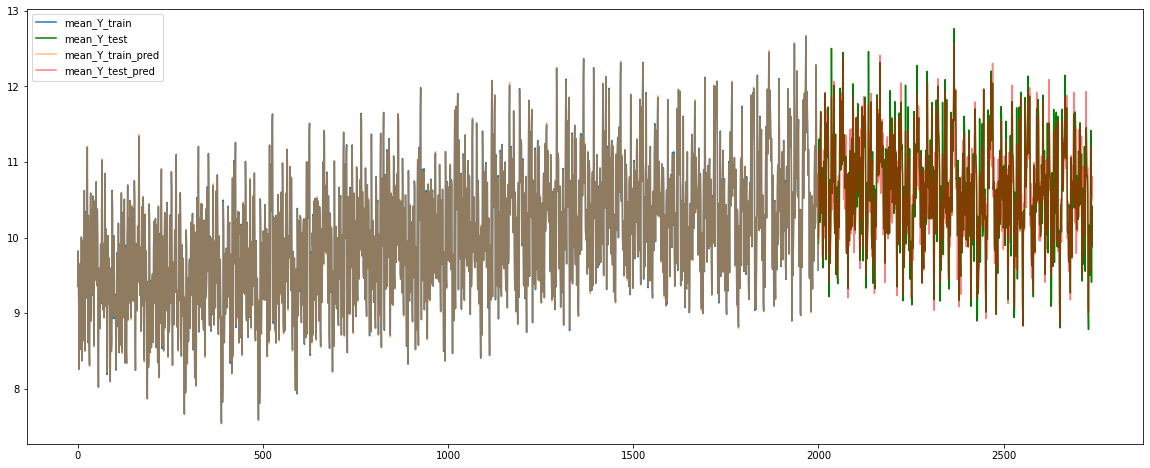

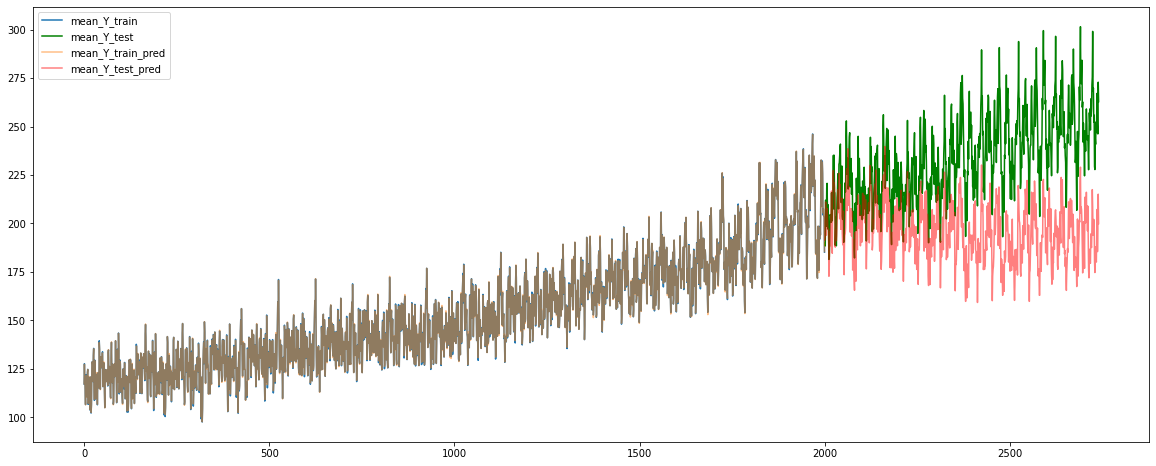

In [33]:
cvxgb_dict = {'cv' : cvxgb, 'step' : 100, 'gap' : 0}
for t in targets:
    print(t)
    target_dict[t] = run_cv(df, date_time, features, t, cvxgb_dict, xgbreg, mape, True)